In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('diabetes_test.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,1,89,66,28.1,21,0
1,2,137,40,43.1,33,1
2,3,78,50,31.0,26,0
3,4,115,72,35.3,35,1
4,0,95,60,25.8,23,0


In [5]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    10 non-null     int64  
 1   Glucose        10 non-null     int64  
 2   BloodPressure  10 non-null     int64  
 3   BMI            10 non-null     float64
 4   Age            10 non-null     int64  
 5   Outcome        10 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 608.0 bytes


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.100000,112.300000,65.000000,32.160000,32.700000,0.500000
std,2.330951,26.795729,13.597385,5.388712,10.646335,0.527046
min,0.000000,78.000000,40.000000,25.800000,21.000000,0.000000
25%,1.250000,90.500000,56.250000,28.325000,23.750000,0.000000
50%,2.500000,107.000000,68.000000,30.750000,30.500000,0.500000
75%,4.750000,135.250000,74.250000,34.875000,39.500000,1.000000
max,7.000000,155.000000,82.000000,43.100000,50.000000,1.000000


# visulization`

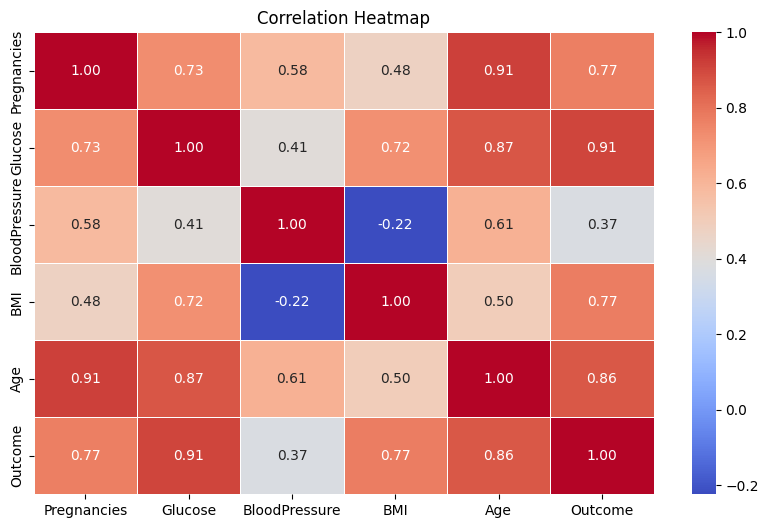

In [15]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter Plot 

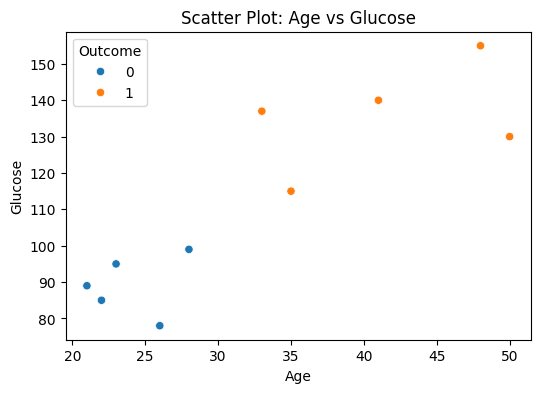

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title("Scatter Plot: Age vs Glucose")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

# Box Plottingm

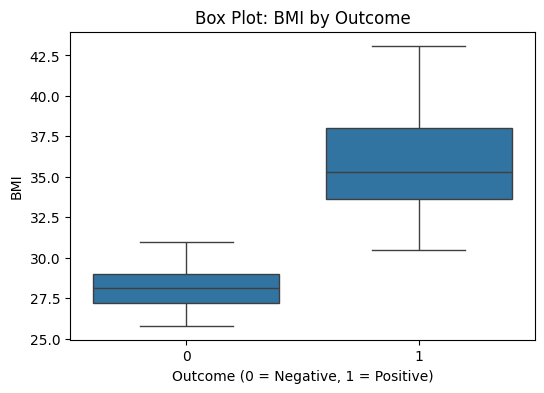

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("Box Plot: BMI by Outcome")
plt.xlabel("Outcome (0 = Negative, 1 = Positive)")
plt.ylabel("BMI")
plt.show()

# hitorgram ploting

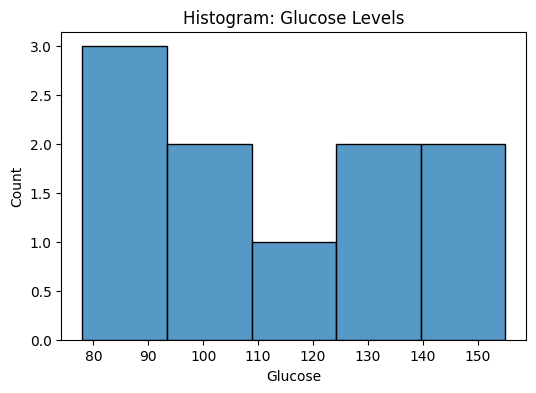

In [21]:
# 3. HISTOGRAM: Distribution of Glucose
plt.figure(figsize=(6, 4))
sns.histplot(df["Glucose"])
plt.title("Histogram: Glucose Levels")
plt.xlabel("Glucose")

plt.show()

# Feature Selection

In [22]:
x = df.iloc[:,:-1]
y = df["Outcome"]

# Train test spliting 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, )

# trian model

In [24]:
model = GaussianNB()

In [25]:
model.fit(x_train, y_train)

GaussianNB()

# Predictionm

In [27]:
model.score(x_test, y_test)*100

100.0

# check the overfittingm

In [28]:
print(model.score(x_train, y_train)*100, model.score(x_test, y_test)*100)

100.0 100.0


# confursion Matrix

In [29]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_pred, y_test)

print("Classification Repot : ", cm)

Classification Repot :  [[2]]


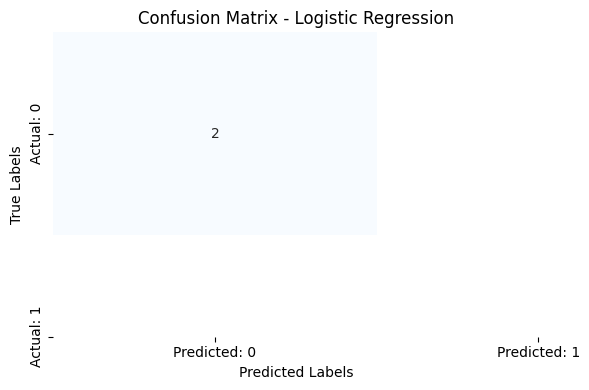

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()